In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

car_price_prediction = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data', header=None)
print(car_price_prediction)


     0    1            2       3      4     5            6    7      8   \
0     3    ?  alfa-romero     gas    std   two  convertible  rwd  front   
1     3    ?  alfa-romero     gas    std   two  convertible  rwd  front   
2     1    ?  alfa-romero     gas    std   two    hatchback  rwd  front   
3     2  164         audi     gas    std  four        sedan  fwd  front   
4     2  164         audi     gas    std  four        sedan  4wd  front   
..   ..  ...          ...     ...    ...   ...          ...  ...    ...   
200  -1   95        volvo     gas    std  four        sedan  rwd  front   
201  -1   95        volvo     gas  turbo  four        sedan  rwd  front   
202  -1   95        volvo     gas    std  four        sedan  rwd  front   
203  -1   95        volvo  diesel  turbo  four        sedan  rwd  front   
204  -1   95        volvo     gas  turbo  four        sedan  rwd  front   

        9   ...   16    17    18    19    20   21    22  23  24     25  
0     88.6  ...  130  mpfi

In [7]:
car_price_prediction.rename(columns = {0:'symboling', 
                     1:'normalized_losses', 
                     2:'make',
                     3:'fuel', 
                     4:'aspiration',
                     5:'no_of_doors',
                     6:'body_style',
                     7:'drive',
                     8:'engine_location', 
                     9:'wheel_base',
                    10:'length',
                     11:'width',
                     12:'height',
                     13: 'curb_weight',
                     14: 'engine_type',
                     15: 'num_of_cylinders',
                     16:'engine_size',
                    17:'fuel_system',
                     18:'bore',
                     19:'stroke',
                     20:'compression_ratio',
                     21: 'horsepower',
                     22:'peak_rpm',
                     23:'city_mpg',
                    24:'highway_mpg',
                     25:'price'}, inplace = True)
print(car_price_prediction.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel               205 non-null    object 
 4   aspiration         205 non-null    object 
 5   no_of_doors        205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive              205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

In [18]:
car_price_prediction.to_csv('/users/amulya/Desktop/csv_files/car_price.csv', index=False)
car_price_prediction.replace('?', pd.NA, inplace=True)
null_values = car_price_prediction.isna().sum()
print(null_values)
car_price_prediction['price'] = pd.to_numeric(car_price_prediction['price'], errors='coerce')
mean = car_price_prediction['price'].mean()
median = car_price_prediction['price'].median()
print(f'mean : {mean} median : {median}')

symboling             0
normalized_losses    41
make                  0
fuel                  0
aspiration            0
no_of_doors           2
body_style            0
drive                 0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64
mean : 13207.129353233831 median : 10295.0


observation :  output column is having 4 null values, there is no particular column which effects output column to be null, so i'll replace null values

Correlation with 'price':
 price                1.000000
engine_size          0.872335
curb_weight          0.834415
width                0.751265
length               0.690628
wheel_base           0.584642
height               0.135486
compression_ratio    0.071107
symboling           -0.082391
city_mpg            -0.686571
highway_mpg         -0.704692
Name: price, dtype: float64


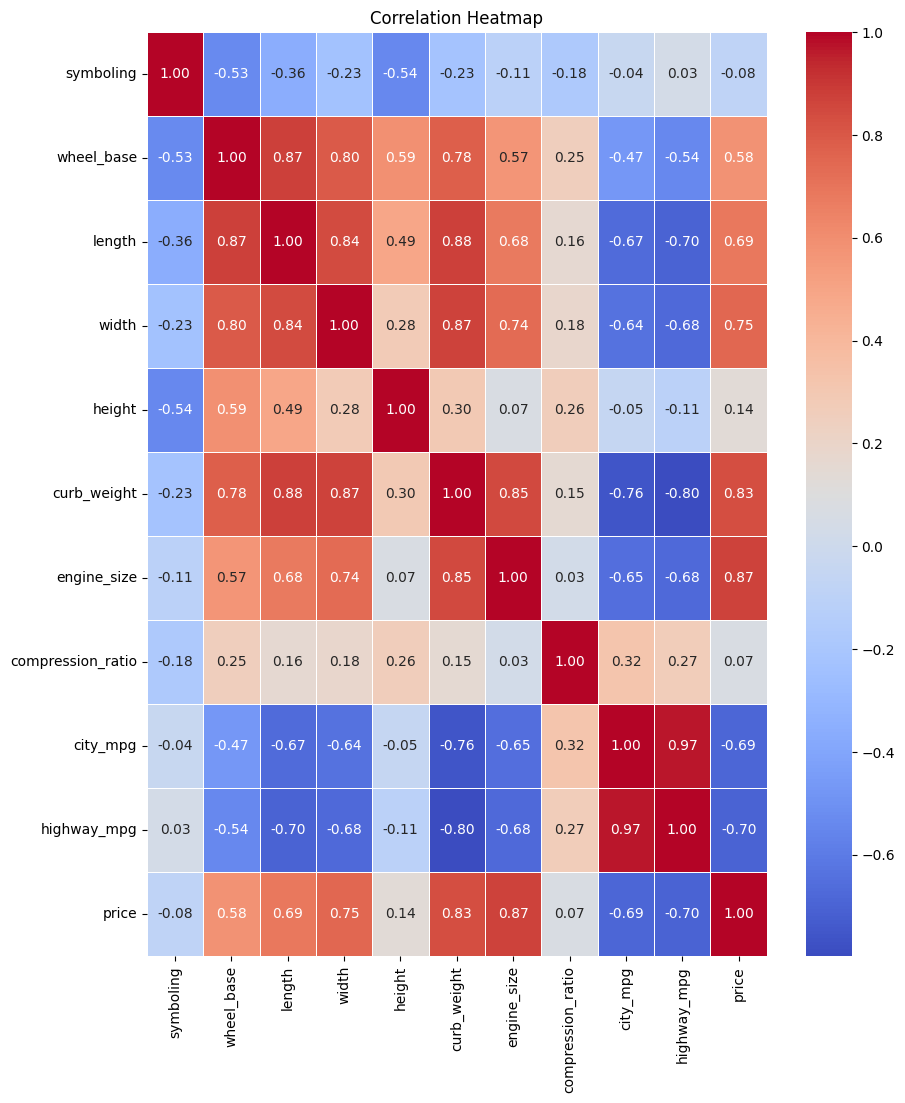

In [27]:
numeric_columns = car_price_prediction.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = car_price_prediction[numeric_columns].corr()
correlation_with_price = correlation_matrix['price'].sort_values(ascending=False)
print("Correlation with 'price':\n", correlation_with_price)
plt.figure(figsize=(10, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()